# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

Загрузим файлы, подключим нужные библиотеки:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_3 = pd.read_csv('/datasets/geo_data_2.csv')
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [7]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, мы видим полностью предобработанные данные, таблицы готовы к работе:

# 2. Обучение и проверка модели

Напишем функцию, которая на вход получает таблицу, делит выборку на обучающую и валидационную в соотношении 3:1. На выходе функция отдает запас предсказанного сырья, правильные ответы валидационной выборки и RMSE модели:

In [8]:
def model_training(df):
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=0.25, random_state=12345)
    
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(df[numeric])
    df[numeric] = scaler.transform(df[numeric])
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions)**0.5
    
    return predictions, target_valid, rmse

Вызовем функцию для трех таблиц и сохраним каждый параметр в отдельной переменной. Выведем на экран средний запас предсказанного сырья и RMSE модели:

In [9]:
predictions_1, target_1, rmse_1 = model_training(df_1)
predictions_2, target_2, rmse_2 = model_training(df_2)
predictions_3, target_3, rmse_3 = model_training(df_3)

[print(f'Средний запас сырья для {n} региона: {i.mean()}, RMSE: {j}') for i, j, n in [[predictions_1, rmse_1, 'первого'], [predictions_2, rmse_2, 'второго'], [predictions_3, rmse_3, 'третьего']]]

Средний запас сырья для первого региона: 92.59256778438038, RMSE: 37.5794217150813
Средний запас сырья для второго региона: 68.728546895446, RMSE: 0.893099286775616
Средний запас сырья для третьего региона: 94.96504596800489, RMSE: 40.02970873393434


[None, None, None]

Из вывода видно, что точность моделей 1 и 3 невелика, а точность модели 2 очень высокая. Построим график и попытаемся понять в чем дело:

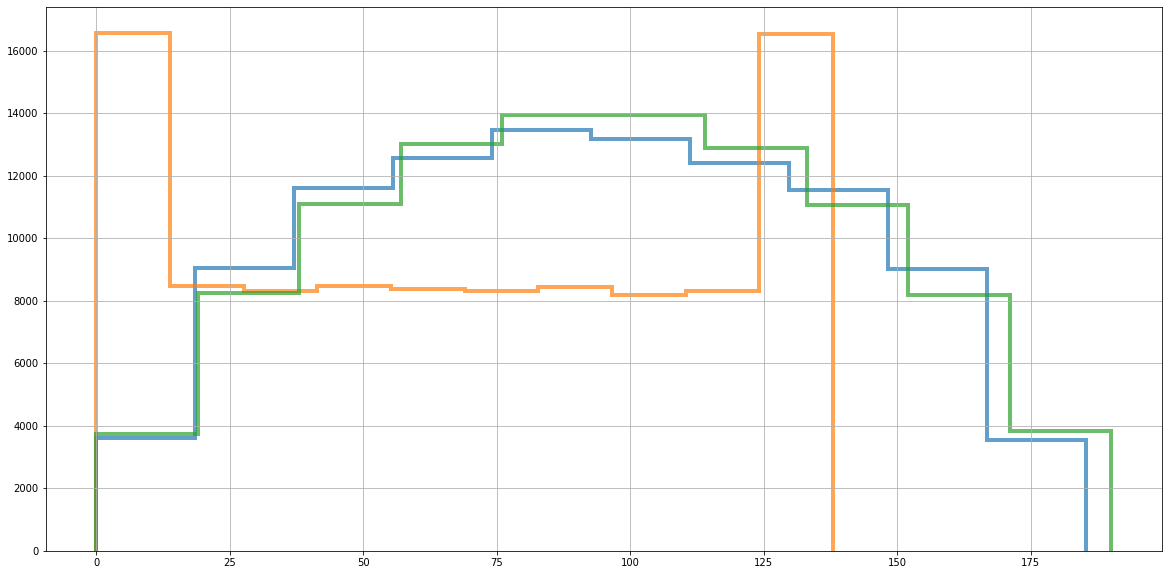

In [10]:
for i in [df_1, df_2, df_3]:
    i['product'].hist(alpha=0.7, histtype='step', linewidth=4, figsize=(20, 10))

Таблицы 1 и 3 имеют нормальное распределение, а таблица 2 имеет два пика, в начале и в конце. Возможно на таких данных модели проще учиться, т.к. в данной таблице лучше виден контраст признаков. Также посмотрим уровень корреляции между столбцами и целевым признаком:

In [11]:
df_1.corr(), df_2.corr(), df_3.corr()

(               f0        f1        f2   product
 f0       1.000000 -0.440723 -0.003153  0.143536
 f1      -0.440723  1.000000  0.001724 -0.192356
 f2      -0.003153  0.001724  1.000000  0.483663
 product  0.143536 -0.192356  0.483663  1.000000,
                f0        f1        f2   product
 f0       1.000000  0.182287 -0.001777 -0.030491
 f1       0.182287  1.000000 -0.002595 -0.010155
 f2      -0.001777 -0.002595  1.000000  0.999397
 product -0.030491 -0.010155  0.999397  1.000000,
                f0        f1        f2   product
 f0       1.000000  0.000528 -0.000448 -0.001987
 f1       0.000528  1.000000  0.000779 -0.001012
 f2      -0.000448  0.000779  1.000000  0.445871
 product -0.001987 -0.001012  0.445871  1.000000)

Из таблицы видно, что присутствует высокий уровень корреляции между целевым признаком и третим столбцом. Во второй таблице, в третьем столбце, уровень корреляции в два раза больше, чем в таблицах 1 и 3, что также объясняет высокое качество второй модели.

# 3. Подготовка к расчёту прибыли

Все ключевые значения для расчётов (бюджет, цена нефти, топ-200 скважен) сохраним в отдельных переменных:

In [12]:
BUDGET = 10000000000
PRICE_THOUSAND_BARRELS = 450000
TOP_WELLS = 200

Выведем на экран достаточный объём сырья для безубыточной разработки новой скважины и средний объем сырья для каждого региона:

In [13]:
print()
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {BUDGET / PRICE_THOUSAND_BARRELS / TOP_WELLS}')
print()
[print(f'Средний объём сырья для {n} региона: {i.mean()}') for i, n in [[df_1['product'], 'первого'], [df_2['product'], 'второго'], [df_3['product'], 'третьего']]]


Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111

Средний объём сырья для первого региона: 92.50000000000001
Средний объём сырья для второго региона: 68.82500000000002
Средний объём сырья для третьего региона: 95.00000000000004


[None, None, None]

Из вывода видно, что средний объем меньше чем достаточный объём сырья для безубыточной разработки, а это значит, что нам нужно выбрать только те скважины, в которых запас выше среднего. Напишем функцию расчета прибыли, которая на вход будет получать предсказания объемов сырья, находить топ-200 лучших скважин и по индексам отбирать реальные скважины из ответов валидационной выборки, преобразуя количество в стоимость минус бюджет: 

In [14]:
def profit_calculation(target, predictions, top_wells, budget):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    selected = target[predictions.index][:top_wells]
    return selected.sum() * PRICE_THOUSAND_BARRELS - budget

# 4. Расчёт прибыли и рисков 

С помощью техники bootstrap расчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков:

In [15]:
import warnings
warnings.filterwarnings('ignore')

values = []

state = np.random.RandomState(12345)

for i, j in [[target_1, predictions_1], [target_2, predictions_2], [target_3, predictions_3]]:
    for n in range(1000):
        target_subsample = i.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        predictions_subsample = pd.Series(j)[target_subsample.index]

        values.append(profit_calculation(target_subsample, predictions_subsample, TOP_WELLS, BUDGET))

    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(0.975)

    mean = values.mean()
   
    print("Средняя выручка:", int(mean))
    print("2.5%-квантиль:", int(lower))
    print("97.5%-квантиль:", int(upper))
    print("Уровень риска:", (values < 0).mean() * 100, '%')
    print()
    values = []

Средняя выручка: 425938526
2.5%-квантиль: -102090094
97.5%-квантиль: 947976353
Уровень риска: 6.0 %

Средняя выручка: 518259493
2.5%-квантиль: 128123231
97.5%-квантиль: 953612982
Уровень риска: 0.3 %

Средняя выручка: 420194005
2.5%-квантиль: -115852609
97.5%-квантиль: 989629939
Уровень риска: 6.2 %



# Вывод:

Из вывода видно, что самая высокая средняя прибыль и самые низкие риски у второго региона. Второй регион самый перспективный для разработки.